In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller as ADF
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima_model import ARIMA
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

D:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


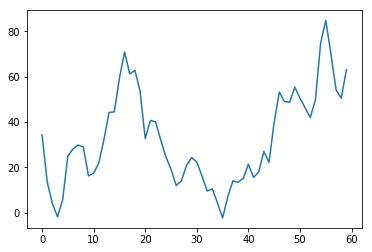

In [2]:
# weight = [22, 40, 21, 4, 2]
# weight = [16, 37, 14, 4, 8]
# weight = [53, 58, 46, 21, 15]
# weight = [33, 64, 50, 4, 5]
# weight = [15, 40, 33, 3, 3]
weight = [15, 46, 35, 2, 5]
datas = pd.read_csv('600905.csv')
seq = datas['BSI6'] * weight[0] + datas['openNR'] * weight[1] + datas['closeNR'] * weight[2] + datas['highNR'] * weight[3] + datas['lowNR'] * weight[4]
seqs = pd.DataFrame(seq)
seqs.columns = ['seq']
plt.plot(seqs)
plt.savefig('pic/600905_fin_BSI6_index')
plt.show()

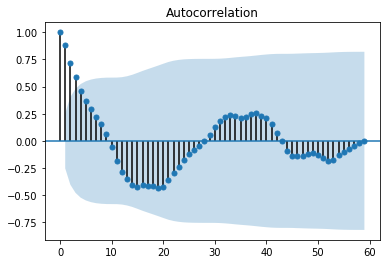

In [3]:
plot_acf(seqs).show()

In [4]:
print(u'原始序列的ADF结果：',ADF(seqs['seq']))

原始序列的ADF结果： (-1.2872682591217182, 0.6349767851422276, 5, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 343.650051113199)


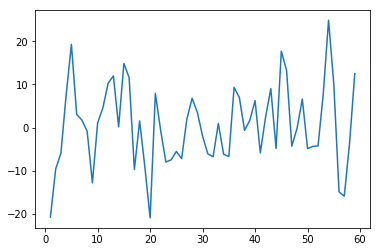

In [5]:
seqs_d = seqs.diff().dropna()
seqs_d.columns=['seq_d']
plt.plot(seqs_d)
plt.show()

差分序列的ADF结果： (-3.1591113358964513, 0.022476861051143927, 4, 54, {'1%': -3.55770911573439, '5%': -2.9167703434435808, '10%': -2.59622219478738}, 335.88160424094997)
差分序列的白噪声检验结果： (array([4.55150341]), array([0.03288986]))


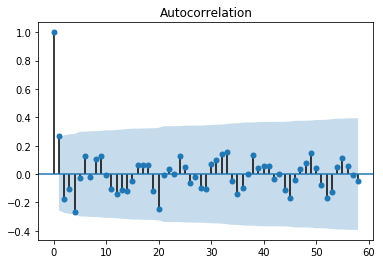

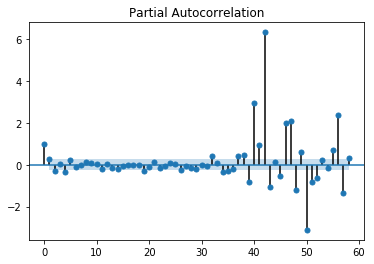

In [6]:
plot_acf(seqs_d).show()
plot_pacf(seqs_d).show()
print(u'差分序列的ADF结果：',ADF(seqs_d['seq_d']))
print(u'差分序列的白噪声检验结果：', acorr_ljungbox(seqs_d, lags=1))

In [7]:
seqs['seq'] = seqs['seq'].astype(float)
pmax = int(len(seqs_d) / 10)
qmax = int(len(seqs_d) / 10)
bic_matrix = []
for p in range(pmax + 1):
    tmp = []
    for q in range(qmax + 1):
        try:
            tmp.append(ARIMA(seqs, (p, 1, q)).fit().bic)
        except:
            tmp.append(None)
    bic_matrix.append(tmp)

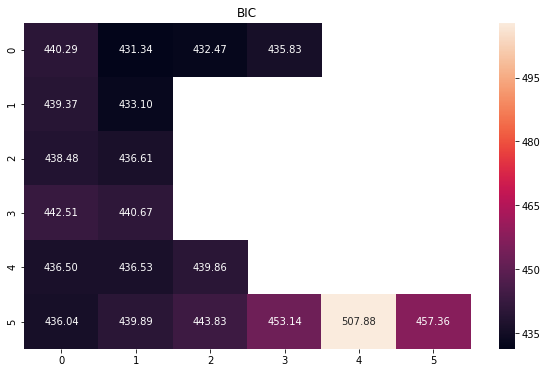

BIC最小的p值和q值：0,1


In [8]:
bic_matrix = pd.DataFrame(bic_matrix)
fig, ax = plt.subplots(figsize = (10,6))
ax = sns.heatmap(bic_matrix, mask = bic_matrix.isnull(), ax = ax, annot = True, fmt = '.2f')
ax.set_title('BIC')
plt.show()
p,q = bic_matrix.stack().idxmin()
print(u'BIC最小的p值和q值：%s,%s'%(p,q))

In [9]:
forecastnum = 5
model = ARIMA(seqs, (p,1,q)).fit()
summary = model.summary()
forecast = model.forecast(forecastnum)
print(summary)
print(forecast)

                             ARIMA Model Results                              
Dep. Variable:                  D.seq   No. Observations:                   59
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -209.554
Method:                       css-mle   S.D. of innovations              8.387
Date:                Sun, 24 Apr 2022   AIC                            425.109
Time:                        00:27:46   BIC                            431.341
Sample:                             1   HQIC                           427.542
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4355      1.861      0.234      0.816      -3.212       4.083
ma.L1.D.seq     0.7163      0.105      6.824      0.000       0.511       0.922
                                    Roots       